<a href="https://colab.research.google.com/github/matsunori39/Deep-Learning-from-scratch/blob/main/Deep_Learning_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3章 ニューラルネットワーク

## 3.2 活性化関数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 3.2.4 シグモイド関数の実装

In [2]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [3]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

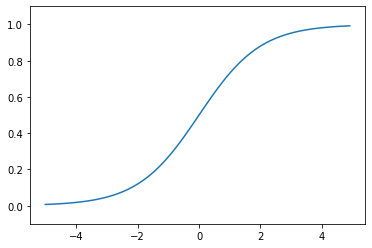

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

## 3.4 3層ニューラルネットワークの実装

### 3.4.2 各層における信号伝達の実装

In [5]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

In [6]:
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [7]:
A1 = np.dot(X, W1) + B1

In [8]:
Z1 = sigmoid(A1)

In [9]:
print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [10]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [11]:
print(Z1.shape)
print(W2.shape)
print(B2.shape)

(3,)
(3, 2)
(2,)


In [12]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

In [13]:
def identity_function(x):
  return x

In [14]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [15]:
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

### 3.4.3 実装のまとめ

In [16]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network

In [17]:
def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

In [18]:
network = init_network()
x = np.array([1.0, 5.0])
y = forward(network, x)
print(y)

[0.33098211 0.72778046]


## 3.5 出力層の設計

### 3.5.1 恒等関数とソフトマックス関数

In [19]:
a = np.array([0.3, 2.9, 4.0])

In [20]:
exp_a = np.exp(a)
print(exp_a)

[ 1.34985881 18.17414537 54.59815003]


In [21]:
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

74.1221542101633


In [22]:
y = exp_a / sum_exp_a
print(y)

[0.01821127 0.24519181 0.73659691]


In [23]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  
  return y

### 3.5.2 ソフトマックス関数の実装上の注意

In [24]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [25]:
c = np.max(a)
a - c

array([  0, -10, -20])

In [26]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [27]:
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a - c) # オーバーフロー対策
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

## 3.6 手書き数字認識

### 3.6.1 MNISTデータセット

In [28]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 457, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 457 (delta 0), reused 1 (delta 0), pack-reused 453
Receiving objects: 100% (457/457), 5.52 MiB | 12.76 MiB/s, done.
Resolving deltas: 100% (235/235), done.


In [29]:
ls

deep-learning-from-scratch/  sample_data/


In [30]:
cd deep-learning-from-scratch

/content/deep-learning-from-scratch


In [31]:
cd ch03

/content/deep-learning-from-scratch/ch03


In [32]:
import sys, os
sys.path.append(os.pardir)  # 親のディレクトリのファイルをインポートするための設定
from dataset.mnist import load_mnist

In [33]:
# 最初の呼び出しは数分待ちます…
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [34]:
# それぞれのデータの形式を出力
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [52]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
from IPython.display import display

In [53]:
def img_show(img):
  pil_img = Image.fromarray(np.uint8(img))
  # pil_img.show()
  display(pil_img)

In [46]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [47]:
img = x_train[0]
label = t_train[0]
print(label)  # 5

5


In [48]:
print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

(784,)
(28, 28)


In [54]:
img_show(img)

### 3.6.2 ニューラルネットワークの推論処理